# Fetch raw data
MNSIT is an org that put out 70K pictures of handwritten numerical digits. It's understood in the ML community that saying MNIST refers to the dataset, because this is an industry-standard beginner's exercise, like the "Hello, World" of ML.

If we successfully download the images, the keys will look like:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details','categories', 'url'])

In [66]:
from sklearn.datasets import fetch_openml # this is tool for fetching named datasets
mnist = fetch_openml('mnist_784', version=1) #need to download 15 megabytes of compressed images (55 mb) once, then scikit will cache it automatically
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [67]:
import pandas as pd
import numpy as np

# Dividing data
Before we split training vs testing data, we need to split between inputs and outputs

__INPUTS__: "X" represents the images (inputs)<br>
__OUTPUTS__:"y" represents the actual numerical values, represented eventually as integers

In [68]:
X = mnist["data"]
y = mnist["target"]

# Eyeballing data
"X" represents the images<br>
"y" represents the actual numerical values, represented eventually as integers

In [69]:
type(X)

pandas.core.frame.DataFrame

In [70]:
X.shape  # (70000, 784) because there's 70,000 images and 784 features/data points per image (28x28 pixels)

(70000, 784)

In [71]:
y.shape  # verifies there's 70,000 numerical values assigned to said images

(70000,)

In [74]:
#converting to numpy in response to an error message
X = X.to_numpy()

In [75]:
X[0] # this is how one image looks, a  matrix of values up to 256 (shades of gray)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# Preparing data
"X" represents the images<br>
"y" represents the actual numerical values, represented eventually as integers

In [76]:
y[0] #what's the 1st digit marked as? CAUTION: answer is in string format, so we will later convert to integers

'5'

In [77]:
y = y.astype(np.uint8) # convert string to integer
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

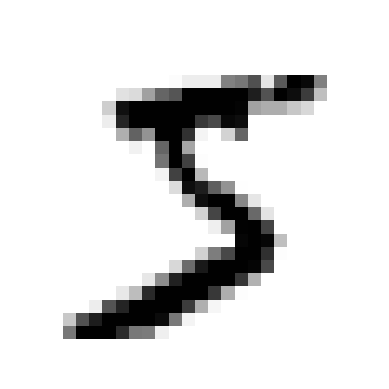

In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0] #seeing the 1st of 70,000 images
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [79]:
training_quantity = 60000 #we are taking the first 60,000 of 70,000

X_train = X[:training_quantity]
y_train = y[:training_quantity]

X_test = X[training_quantity:]
y_test = y[training_quantity:]

# Binary Classification (Hot dog...not hot dog)
#### The next code block is confusing because you might expect something like:

__x_train_5__ and<br>
__y_train_5__ combined will inform us on how...<br>
<br>
__x_test_5__ predicts<br>
__y_test_5__

#### What we're actually doing:
Just limit the data, both training and testing sets, down to the 5's. We're only focused on understanding whether something is a 5 or not at this point, so any non-5 images or integers will just cause unnecessary confusion.

In [80]:
y_train_5 = (y_train == 5)  # True for 5s, False for others
y_test_5 = (y_test == 5)    # True for 5s, False for others

# Training Methods
### Full-Batch Gradient Descent (more accurate)
- Absorbs all 60,000 examples of training data in one big gulp before calculating model "parameters" weights or coefficients
- More accurate because it's processing all data available
- Slower, so more suitable for smaller data-sets (10K to 40K images)

### Stochiastic Gradient Descent (faster)
- Absorbs 1 image and 1 recalculation at a time, looped 60,000 times
- Which means less pressure on memory usage
- You don't need to wait until all 60,000 images are seen to start benefiting
- Less accurate, because it's like course-correcting a car where you can only see 3 feet ahead of you instead of the full 30 mile route.
- Faster, better for larger datasets, which is why the textbook is assuming SGD over FBGD.

In [83]:
from sklearn.linear_model import SGDClassifier # not the full batch, as discussed above
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# Testing image recognition
### Testing index 0 (value of 5)
Confirmed, but let's try some other examples we know aren't 5's

In [88]:
y[0]

np.uint8(5)

In [89]:
sgd_clf.predict([some_digit])

array([ True])

### Testing index of 1 (value of 3)
Confirmed! That makes us 2 for 2 on guesses, 1 correct positive and 1 correct negative.

In [94]:
y[1]

np.uint8(0)

In [95]:
sgd_clf.predict([X[1]])

array([False])

# What's cross-validation and mechanically, how do I do it?
In the first project on housing price predictions, remember how we chopped training data?
- We started with 70,000 images
- 60,000 is training data
- We take the training data and cut into 5 evenly-sized "folds" of 12,000 images each
- Looping 5 times, we train on 4 of 5 folds, then use the remaining fold as test data against the other 48,000

# Overfitting risk and how cross-validation mitigates it
- Overfitting is when your model falsely concludes generalized patterns based on happenstance patterns it sees in that particular training data i.e. it's taking the data too literally
- Cross-validation looks at the training data from 5 instead of 1 camera angle, leading to more robust conclusions

In [105]:

'''PAUSING ON THIS CODE BECAUSE IT DOESN'T SYNC WITH THE CROSS_VAL_SCORE TOOL BELOW
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# book forgets to set shuffle to True
skfolds = StratifiedKFold(n_splits=3, shuffle = True, random_state=42) # I was gonna use 10 folds, but textbook dictated only 3

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

'''

"PAUSING ON THIS CODE BECAUSE IT DOESN'T SYNC WITH THE CROSS_VAL_SCORE TOOL BELOW\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.base import clone\n\n# book forgets to set shuffle to True\nskfolds = StratifiedKFold(n_splits=3, shuffle = True, random_state=42) # I was gonna use 10 folds, but textbook dictated only 3\n\nfor train_index, test_index in skfolds.split(X_train, y_train_5):\n    clone_clf = clone(sgd_clf)\n    X_train_folds = X_train[train_index]\n    y_train_folds = y_train[train_index]\n    X_test_fold = X_train[test_index]\n    y_test_fold = y_train_5[test_index]\n    \n    clone_clf.fit(X_train_folds, y_train_folds)\n    y_pred = clone_clf.predict(X_test_fold)\n    n_correct = sum(y_pred == y_test_fold)\n    print(n_correct / len(y_pred))\n\n"

In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

# Accuracy calculated, but misleading
To the untrained eye, it's exciting to see 3 fold's scores averaging 95.7% accuracy within minutes. However, consider this:
- There are 10 unique answers ranging from 0 through 9 inclusive
- Assuming a roughly even and random distribution of number choices, that means a 5 would show up ~ 10% of the time and ~90% it would not be a 5
- So you could create a ~90% accurate model simply by instructing it __"always assume it's not a 5"__

# Smarter way to evaluate results: "Precision" & "Recall"
  
### What is "Precision"?
- Prioritizes __quality__: *When someone gives me an answer, how much should I trust it?*
- Defined as (True Positives) / (True Positives + False Positives)
- For example, a call center wants to authenticate inbound phone callers's phone numbers while the customer is still inside the phone maze. If 1,000 consumers dial, there's typically 999 legitimates and 1 scammer using a fake phone number. Good precision is greenlighting only 700 of those 999 legitimates, but knowing that all 700 are in fact legitimate. We are willing to accept that 299 were not greenlit and inconvenienced by the customer service rep's oral questions.

### What is "Recall"?
- Prioritizes __quantity__: *Did I catch all the Pokemon?*
- Defined as (True Positives) / (True Positives + False Negatives)
- You are a HR employee tasked with the first stages of talent acquisition and your CEO has challenged you to bring as many unicorn candidates to the table, but is expecting 3 final round candidates. After posting the job, you have 500 inbound resumes, and it is reasonable to expect there are 4 standouts in the pool, but you need to phone screen them to evaluate. You should make an educated guess as to who the best 50 phone screen candidates are to find 3 viable candidates, even if it cost you 47 dud calls. Even if your precision is only 6% (3/50), your recall is 75% (3 of 4). 

### Forced tradeoffs
You can't increase both precision AND recall at the same time.

# Confusion Matrix
A grid that will show what we guessed vs what it actually is, with values in each cell as to the accuracy or occurrence. Ideally, we'd want a dark line that goes diagonally from top left to bottom right.

Breakdown:
- 54,579 actually not 5's
  - 53,057 correctly reported as not 5 __true negative__
  - 687 incorrectly reported as a 5 __false positive__

- 5,421 actual 5s
  - 1,891 incorrectly reported as not 5 __false negatives__
  - 3,530 correctly reported as a 5 __true positives__

Going horizontally across columns is the model's prediction
Going vertically down across rows is the truth

In [110]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

array([ True, False, False, ...,  True, False, False])

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

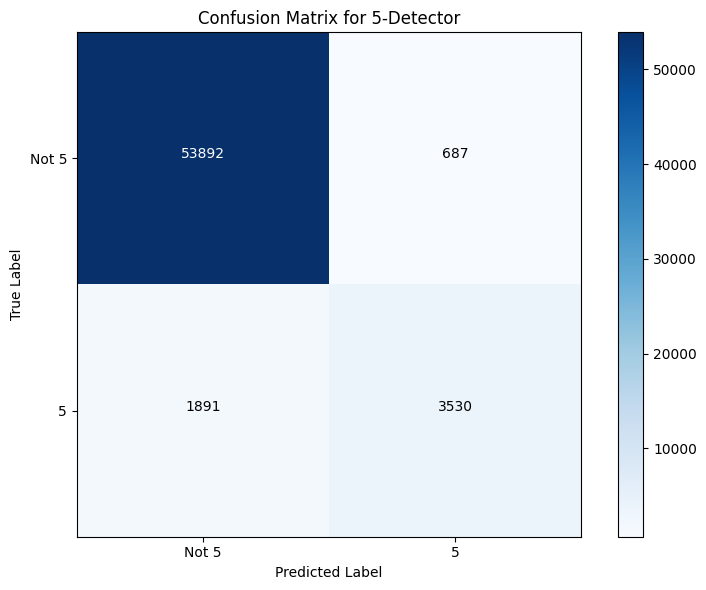

In [116]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

plt.figure(figsize=(8, 6))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for 5-Detector")
plt.colorbar()  # Show the color bar for reference

# Define tick marks and labels
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not 5", "5"])
plt.yticks(tick_marks, ["Not 5", "5"])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add text annotations (the actual values)
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()